In [ ]:
from google.colab import drive
drive.mount('/content/path')

Drive already mounted at /content/path; to attempt to forcibly remount, call drive.mount("/content/path", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path=('/content/path/MyDrive/csv files/customer_churn_data.csv')
df=pd.read_csv(path)

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [ ]:
mode=df['InternetService'].mode()[0]
mode

'Fiber Optic'

In [ ]:
df['InternetService'].fillna(mode)

,InternetService
0,Fiber Optic
1,Fiber Optic
2,Fiber Optic
3,DSL
4,Fiber Optic
...,...
995,Fiber Optic
996,Fiber Optic
997,Fiber Optic
998,Fiber Optic


In [ ]:
df['Gender'].unique(),df['ContractType'].unique(),df['InternetService'].unique(),df['TechSupport'].unique(),df['Churn'].unique()

(array(['Male', 'Female'], dtype=object),
 array(['Month-to-Month', 'One-Year', 'Two-Year'], dtype=object),
 array(['Fiber Optic', 'DSL', nan], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

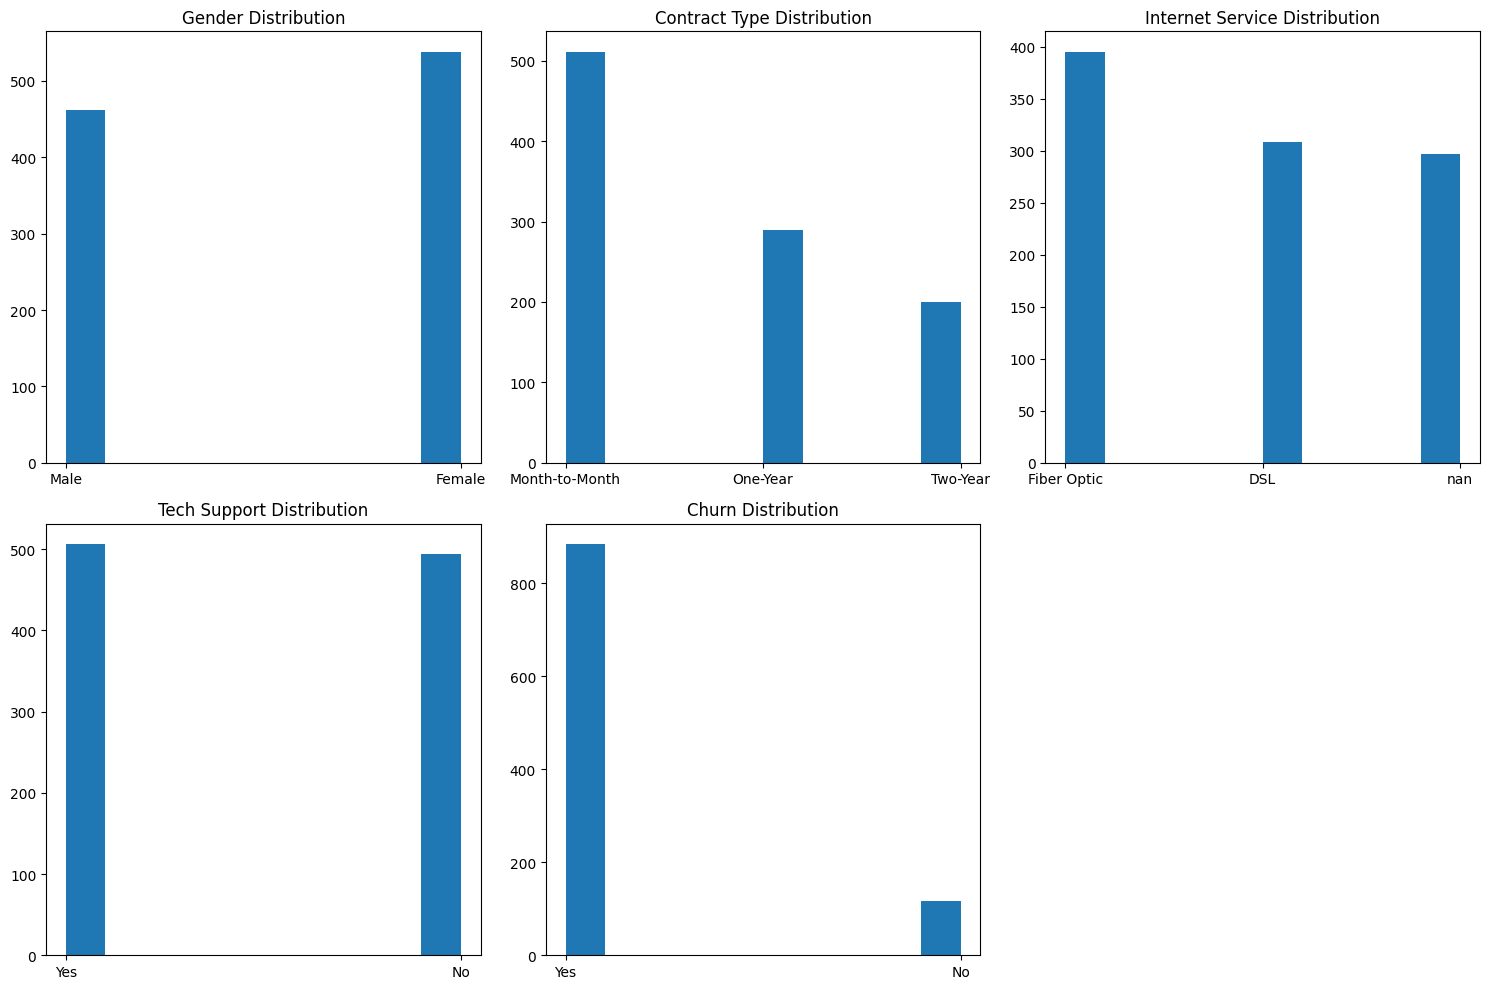

In [ ]:
for col in ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']:
    df[col] = df[col].astype(str)
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.hist(df['Gender'])
plt.title('Gender Distribution')
plt.subplot(2, 3, 2)
plt.hist(df['ContractType'])
plt.title('Contract Type Distribution')
plt.subplot(2, 3, 3)
plt.hist(df['InternetService'])
plt.title('Internet Service Distribution')
plt.subplot(2, 3, 4)
plt.hist(df['TechSupport'])
plt.title('Tech Support Distribution')
plt.subplot(2, 3, 5)
plt.hist(df['Churn'])
plt.title('Churn Distribution')
plt.tight_layout()

<Axes: xlabel='Gender', ylabel='Age'>

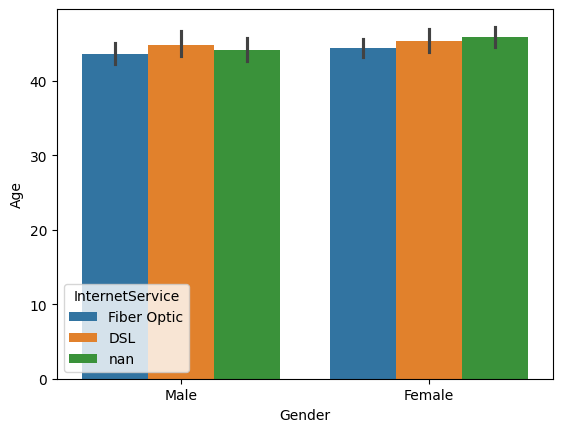

In [ ]:
sns.barplot(x='Gender', y='Age',hue='InternetService' ,data=df)

<Axes: xlabel='Age', ylabel='MonthlyCharges'>

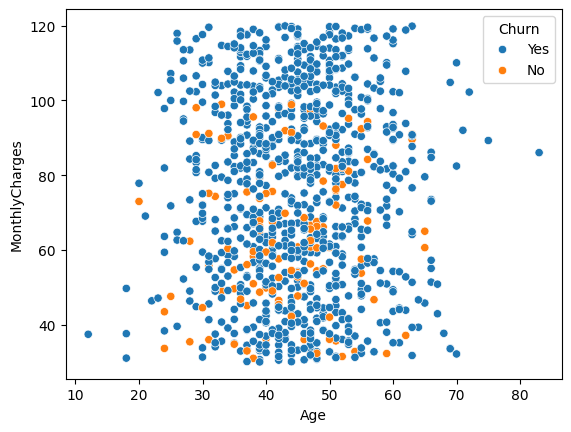

In [ ]:
sns.scatterplot(x='Age', y='MonthlyCharges', hue='Churn', data=df)

<Axes: xlabel='Churn', ylabel='Age'>

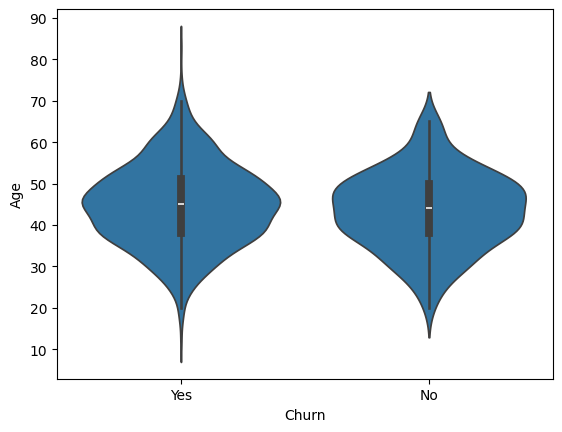

In [ ]:
sns.violinplot(x='Churn', y='Age', data=df)

<Axes: xlabel='InternetService', ylabel='Age'>

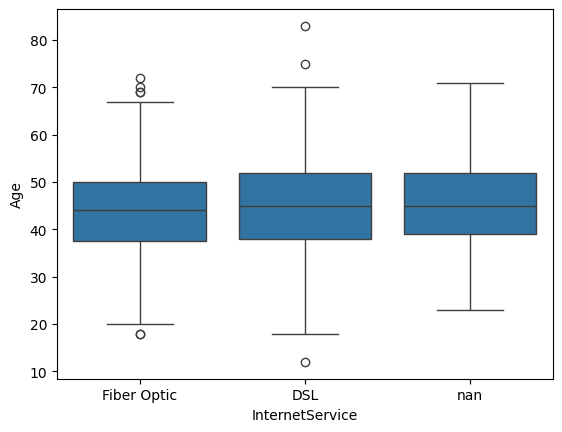

In [ ]:
sns.boxplot(x='InternetService', y='Age', data=df)

<Axes: xlabel='Churn', ylabel='Age'>

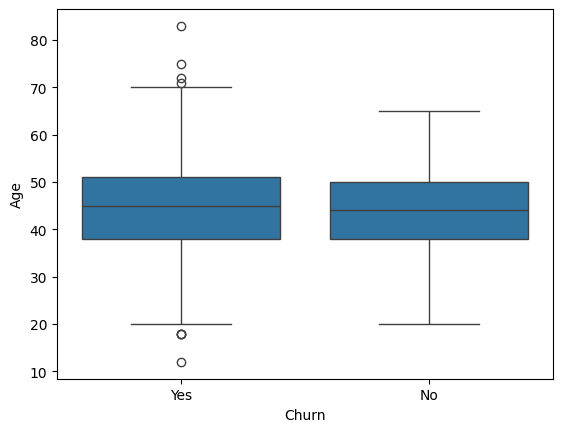

In [ ]:
sns.boxplot(x='Churn', y='Age', data=df)

<Axes: xlabel='InternetService', ylabel='count'>

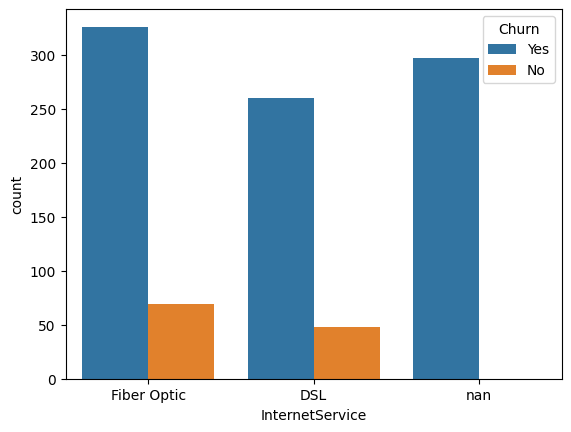

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df)

<Axes: xlabel='ContractType', ylabel='count'>

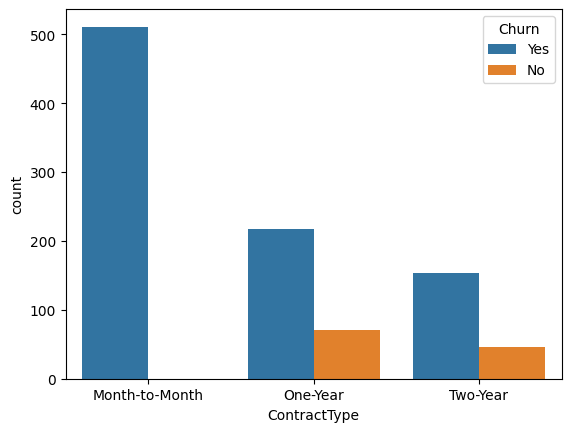

In [ ]:
sns.countplot(x='ContractType', hue='Churn', data=df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
categorical_features = ['Gender', 'ContractType', 'InternetService', 'TechSupport']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
categorical_features = ['Gender', 'ContractType', 'InternetService', 'TechSupport']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Predicted Values:")
print(y_pred)

Accuracy: 0.995
Predicted Values:
['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
categorical_features = ['Gender', 'ContractType', 'InternetService', 'TechSupport']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [ ]:
results_df = pd.DataFrame({'Actual Churn': y_test, 'Predicted Churn': y_pred})
results_df = pd.concat([X_test, results_df], axis=1)print(results_df)

     CustomerID  Age  Tenure  MonthlyCharges  TotalCharges  Gender_Male  \
521         522   50       0          104.12          0.00        False   
737         738   54       2          119.33        238.66        False   
740         741   26      11          117.96       1297.56         True   
660         661   39      26          113.38       2947.88        False   
411         412   33       6           54.97        329.82         True   
..          ...  ...     ...             ...           ...          ...   
408         409   46      29          115.24       3341.96         True   
332         333   45      13          101.33       1317.29         True   
208         209   50       4          110.76        443.04         True   
613         614   33       7           59.27        414.89         True   
78           79   45      22          103.34       2273.48         True   

     ContractType_One-Year  ContractType_Two-Year  \
521                  False                   T